In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:

data = pd.read_csv("diabetes.csv")


In [3]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [4]:

data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [5]:
# Replace zeros with mean for selected columns
cols_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in cols_to_replace:
    data[column].replace(0, np.nan, inplace=True)
    data[column].fillna(round(data[column].mean(skipna=True)), inplace=True)

In [ ]:
# Features and target
X = data.iloc[:, :8]   

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

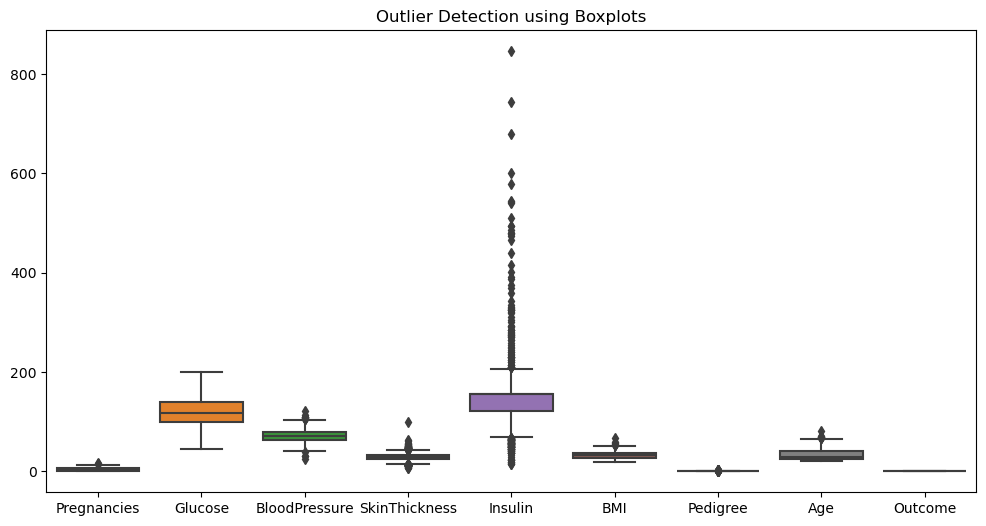


Number of Outliers per Feature:
 Pregnancies        4
Glucose            0
BloodPressure     14
SkinThickness     87
Insulin          159
BMI                8
Pedigree          29
Age                9
Outcome            0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data)
plt.title("Outlier Detection using Boxplots")
plt.show()


Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of Outliers per Feature:\n", outliers)


In [ ]:
# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:

knn_pred = knn.predict(X_test)

In [18]:
# Metrics
cm = confusion_matrix(Y_test, knn_pred)
accuracy = accuracy_score(Y_test, knn_pred)
error_rate = 1 - accuracy

In [ ]:

print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy)
print("Error Rate:", error_rate)
print(classification_report(Y_test, knn_pred))

Confusion Matrix:
 [[88 19]
 [19 28]]
Accuracy Score: 0.7532467532467533
Error Rate: 0.24675324675324672
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       107
           1       0.60      0.60      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



K = 3 → Accuracy = 72.73%
K = 5 → Accuracy = 75.32%
K = 7 → Accuracy = 75.97%


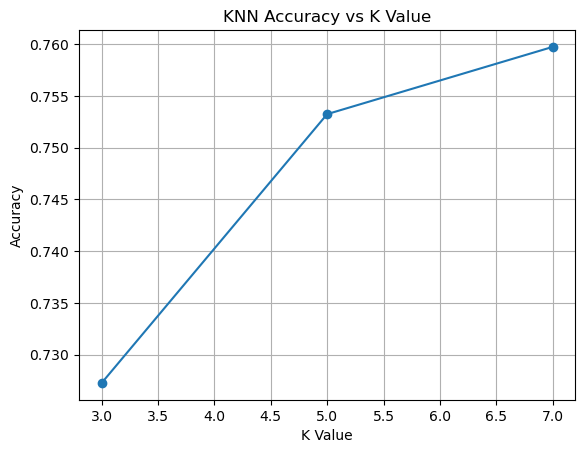

In [20]:
accuracy_scores = []

for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    knn_pred = knn.predict(X_test)
    acc = accuracy_score(Y_test, knn_pred)
    accuracy_scores.append(acc)
    print(f"K = {k} → Accuracy = {acc * 100:.2f}%")

plt.plot([3, 5, 7], accuracy_scores, marker='o')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()